**VGG**

Convolution layer와 Pooling layer로 구성되는 기본적인 CNN.<br/>
다만, 비중있는 layer(Conv_layer, Fully-connected _layer)를 <br/>
모두 16층 또는 19층으로 심화한것이 특징이다. <br/>
층의 깊이에 따라 'Vgg16', 'VGG19'로 구분하기도 한다. <br/>

<순서>
1. GPU 연산 설정
2. Tensorflow 버전과 GPU 사용 여부 확인
3. MNIST 데이터 로드
4. 신경망 생성<br/>
    
    <구성> <br/>
    Conv2D -> Conv2D -> MaxPool2D -> Dropout -> Flatten -> Dense
    -> Dropout -> Dense

    Conv2D: filter=32, kernel_size=(3, 3), act_fn=relu <br/>
    Conv2D: filter=64, kernel_size=(3, 3), act_fn=relu <br/>
    Dropout: 비율 0.25(25%) <br/>
    Dense:  퍼셉트론 개수=128, act_fn=relu <br/>
    Dropout: 비율 0.5(50%) <br/>
5. 모델 학습(Fit) 
6. Epochs-Loss / Epochs-Accuracy 그래프


**1. GPU 연산 설정**

**2. Tensorflow 사용 버전을 설정하고 버전과 GPU 사용 여부 확인**

In [1]:
%tensorflow_version 2.x

import tensorflow as tf

print(tf.__version__)
print(tf.test.gpu_device_name())

# 클래스와 모듈 import
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

TensorFlow 2.x selected.
2.1.0-rc1
/device:GPU:0


**3. MNIST 데이터 load / 확인**

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f'X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}')

X_train shape: (60000, 28, 28), Y_train shape: (60000,)
X_test shape: (10000, 28, 28), Y_test shape: (10000,)


In [3]:
# MNIST 데이터를 CNN의 입력 데이터로 사용할 수 있도록 shape 변환

# X_train, X_train = (samples, h, w, 1) 
# ~> samples: 데이터 개수, h: height, w:width
n, h, w = X_train.shape
X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)

print('X_train reshape: ', X_train.shape)
print('X_test reshape: ', X_test.shape)

# Y_train, Y_test = one_hot_encoding
Y_train = to_categorical(Y_train, 10, dtype='float16')
Y_test = to_categorical(Y_test, 10, dtype='float16')

print('Y_train[0]: ', Y_train[0])
print('Y_test[0]: ', Y_test[0])

X_train reshape:  (60000, 28, 28, 1)
X_test reshape:  (10000, 28, 28, 1)
Y_train[0]:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Y_test[0]:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
# 이미지 데이터는 0~255 사이의 값들로 저장되어 있다. 
# 신경망에 보낼 때는 정규화된 값 (0. ~ 1.) 으로 보내면 더 좋은 성능 기대 가능

# X_train, X_test를 0 ~ 1 사이의 값으로 정규화
X_train = X_train.astype('float16')
X_test = X_test.astype('float16')

**4. 신경망 생성<br/>**

  <구성> <br/>
    Conv2D -> Conv2D -> MaxPool2D -> Dropout -> Flatten -> Dense
    -> Dropout -> Dense

  Conv2D: filters=32, kernel_size=(3, 3), act_fn=relu <br/>
  Conv2D: filters=64, kernel_size=(3, 3), act_fn=relu <br/>
  Dropout: 비율 0.25(25%) <br/>
  Dense:  퍼셉트론 개수=128, act_fn=relu <br/>
  Dropout: 비율 0.5(50%) <br/>

In [0]:
# 신경망 모델 생성 -> Sequential 클래스 객체(인스턴스) 생성
model = Sequential()

In [0]:
# Conv2D: filters=32, kernel_size=(3, 3), act_fn=relu
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Conv2D: filters=64, kernel_size=(3, 3), act_fn=relu
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# MaxPool2D
model.add(MaxPool2D(pool_size=2))

# Dropout: 비율 0.25(25%)
model.add(Dropout(rate=0.25))

# Flatten
model.add(Flatten())

# Dense: 퍼셉트론 개수=128, act_fn=relu
model.add(Dense(128, activation='relu'))

# Dropout: 비율 0.5(50%)
model.add(Dropout(rate=0.5))

# Dense(Output_layer)
model.add(Dense(10, activation='softmax'))

**5. 모델 학습(Fit)**

In [7]:
# 신경망 모델 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# 일정 횟수동안 학습의 성과가 없으면 자동으로 stop
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=10)

# 신경망 모델 학습 진행(fit)
history = model.fit(X_train, Y_train,
                    batch_size=200, epochs=50, verbose=1,
                    callbacks=[early_stop],
                    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 178us/sample - loss: 0.8943 - accuracy: 0.8255 - val_loss: 0.0861 - val_accuracy: 0.9733
Epoch 2/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1735 - accuracy: 0.9505 - val_loss: 0.0616 - val_accuracy: 0.9819
Epoch 3/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1282 - accuracy: 0.9632 - val_loss: 0.0502 - val_accuracy: 0.9852
Epoch 4/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1066 - accuracy: 0.9688 - val_loss: 0.0506 - val_accuracy: 0.9858
Epoch 5/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0879 - accuracy: 0.9736 - val_loss: 0.0336 - val_accuracy: 0.9886
Epoch 6/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0763 - accuracy: 0.9775 - val_loss: 0.0395 - val_accuracy: 0.9883
Epoch 7/50
60000/60000 [==============================

**6. Epochs-Loss / Epochs-Accuracy 그래프**

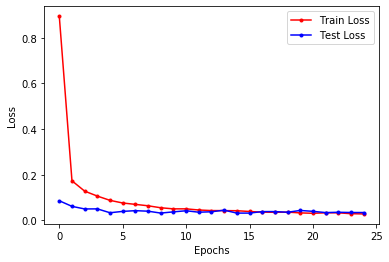

In [9]:
# 학습 데이터 셋과 테스트 데이터 셋의 Epochs-Loss 그래프

# 학습 데이터 셋의 Loss
train_loss = history.history['loss']

# 테스트 데이터 셋의 Loss
test_loss = history.history['val_loss']

x = range(len(train_loss))
plt.plot(x, train_loss, marker='.', color='red', label='Train Loss')
plt.plot(x, test_loss, marker='.', color='blue', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

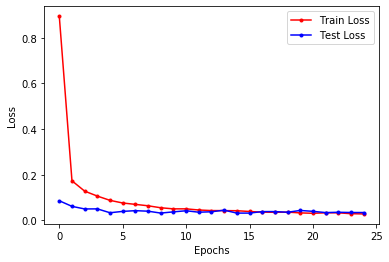

In [11]:
# 학습 데이터 셋과 테스트 데이터 셋의 Epochs-Accuracy 그래프

# 학습 데이터 셋의 Accuracy
train_acc = history.history['accuracy']

# 테스트 데이터 셋의 Accuracy
test_acc = history.history['val_accuracy']

x = range(len(train_acc))
plt.plot(x, train_loss, marker='.', color='red', label='Train Loss')
plt.plot(x, test_loss, marker='.', color='blue', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()